In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In chess Elo calculations, the common divisor $D$ is 400, meaning a 400-point rating difference corresponds to roughly a $90\%$ win probability for the higher-rated player. A game with more randomness (like football or esports) might use a higher divisor (e.g., $D = 500$ or $D = 600$) to reflect greater uncertainty.

The formula for the probability $P_h$ that the home team wins is given by:

$$ \Large P_h = \frac{1}{1 + 10^{\frac{E_a - E_h}{D}}} $$

where:
- $P_h$ is the probability that the home team wins.
- $E_a$ is the Elo rating of the away team.
- $E_h$ is the Elo rating of the home team.
- $D$ is the divisor, which controls how steeply the probability changes with a difference in ratings.
- The term $10^{\frac{E_a - E_h}{D}}$ calculates the relative skill difference between the two players, adjusting it by the divisor $D$.

The formula for the probability $P_a$ that the away player wins is therefore given by:


$$ \Large P_a = 1 - P_h

The formula to calculate the change $c$ in Elo after a game is given by:

$$ \Large \text{c} = I \times \left( r - P_h \right) $$

where:
- $I$ is the value that represents the strength of a given match. It is a constant that controls how much the Elo rating can change after a game. Higher $k$-values are used for more significant matches.
- $r$ is the result of the game. It's 1 if the player wins, 0 if the player loses, and 0.5 for a draw.
- $P_h$ is the probability of the home player winning.

The formula for updating a player's Elo rating is given by:

$$ \Large E' = E \pm c

- $E'$ is the new Elo rating after the game.
- $E$ is the current Elo rating before the game.
- $c$ is the change in the player's Elo rating, calculated using the Elo change formula,
- The $\pm$ indicates that the change will be added if calculating $E'_h$ or subtracted if calculating $E'_a$.


In [ ]:
# In chess Elo calculations, a common divisor is 400, meaning a 400-point rating difference corresponds to roughly a 
# 90% win probability for the higher-rated player. A game with more randomness (like football or esports) might use a 
# higher divisor (e.g., 500 or 600) to reflect greater uncertainty.

def expected(home, away):
    prob = round( 1 / ( 1 + ( 10 ** ( ( away - home ) / 600 ) ) ) , 2 )
    return prob

def elo_change(home, away, k=32, result=1):
    change = round( k * ( result - expected(home, away) ) , 2)
    return change

In [86]:
expected(1450, 1500)

0.45

In [97]:
elo_change(500, 2000)

32.0

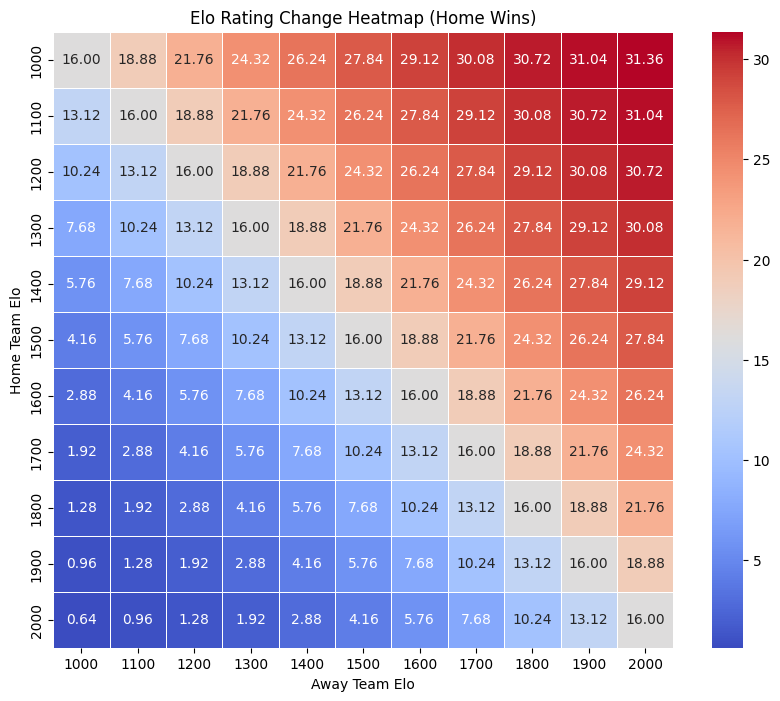

In [98]:
elo_range = np.arange(1000, 2100, 100)

elo_matrix = np.array([[elo_change(home, away) for away in elo_range] for home in elo_range])

plt.figure(figsize=(10, 8))
sns.heatmap(elo_matrix, annot=True, fmt=".2f", xticklabels=elo_range, yticklabels=elo_range, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Away Team Elo")
plt.ylabel("Home Team Elo")
plt.title("Elo Rating Change Heatmap (Home Wins)")
plt.show()